# 初探神經網路 (感知器)

## 1-加載 Library

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2-數據集處理

### 2.1-載入(鳶尾花數據集)
 * sepal length (cm) : 花萼長度
 * sepal width (cm)  : 花萼寬度
 * petal length (cm) : 花瓣長度
 * petal width (cm)  : 花瓣寬度
 * target            : 屬種(花的種類)

In [2]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2.2-刪除(花瓣長度)與(花瓣寬度)

In [3]:
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### 2.3-切割資料集(訓練集,測試集)

In [4]:
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    df['target'],
                                                                    test_size=0.1)

## 3-建立模型-感知器(Perceptron)

In [5]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf = clf.fit(data_train, target_train)

## 4-模型預測

In [7]:
predict = clf.predict(data_test)
print("預測:", list(predict))

預測: [1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0]


## 5-模型準確率分析

In [8]:
from sklearn.metrics import accuracy_score
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

正確標籤: [1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0]
正確率:  73.33333333333333 %


## 6-繪圖(感知器)的決策邊界

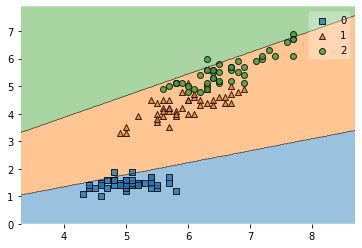

In [10]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),
                      y=np.array(target_train),
                      clf=clf)

## 7-建立模型-單純貝葉斯(Naive Bayes)

In [11]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(data_train, target_train)

## 8-繪圖(單純貝葉斯)的決策邊界

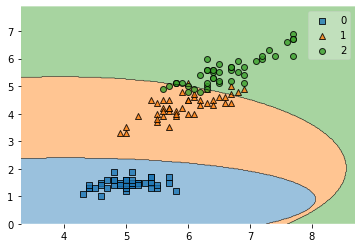

In [12]:
plot_decision_regions(X=np.array(data_train),
                      y=np.array(target_train),
                      clf=clf)

## 9-建立模型-決策樹

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(data_train, target_train)

## 10-繪圖(決策樹)的決策邊界

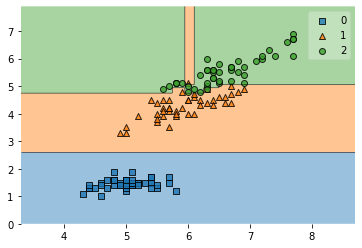

In [16]:
plot_decision_regions(X=np.array(data_train),
                      y=np.array(target_train),
                      clf=clf)

## 11-修改(決策樹深度),觀察決策邊界

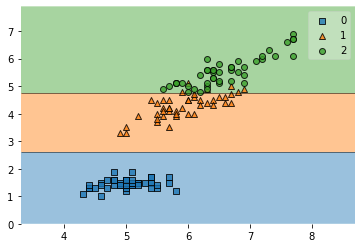

In [25]:
def change_depth(max_depth_value):
    clf = DecisionTreeClassifier(max_depth=max_depth_value)
    clf = clf.fit(data_train, target_train)
    plot_decision_regions(X=np.array(data_train),
                          y=np.array(target_train),
                          clf=clf)
change_depth(3)

## 12-感知器的問題
 * 問題1: 分類方式只有正負之分, 沒有(分類線)的距離概念, 因此較難以理解
 * 解決: 邏輯斯回歸 (Logistic Regression)將可以解決
 * 問題2: 無法解決非線性問題,ex:(XOR問題)
 
<table>
    <tr>
        <td>OR問題</td>
        <td>True</td>
        <td>False</td>
    </tr>
    <tr>
        <td>True</td>
        <td>True</td>
        <td>True</td>
    </tr>
    <tr>
        <td>False</td>
        <td>True</td>
        <td>False</td>
    </tr>
</table>

<table>
    <tr>
        <td>XOR問題</td>
        <td>True</td>
        <td>False</td>
    </tr>
    <tr>
        <td>True</td>
        <td>False</td>
        <td>True</td>
    </tr>
    <tr>
        <td>False</td>
        <td>True</td>
        <td>False</td>
    </tr>
</table>